In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../data/landslideCleaned.csv")

# Convert the 'caused_fatalities' variable to 0's and 1's
df.insert(df.columns.get_loc('caused_fatalities') + 1, 'caused_fatalities_numeric', np.where(df['fatality_count'] > 0, '1', '0'))

# Select the desired features for the logistic regression model
df = df[['landslide_size', 'injury_count', 'longitude', 'latitude', 'caused_fatalities_numeric']]

# Create dummy variables for the 'landslide_size' variable
df.insert(df.columns.get_loc('landslide_size') + 1, 'small_size', np.where(df['landslide_size'] == 'small', 1, 0))
df.insert(df.columns.get_loc('small_size') + 1, 'medium_size', np.where(df['landslide_size'] == 'medium', 1, 0))
df.insert(df.columns.get_loc('medium_size') + 1, 'large_size', np.where(df['landslide_size'] == 'large', 1, 0))
df.insert(df.columns.get_loc('large_size') + 1, 'very_large_size', np.where(df['landslide_size'] == 'very_large', 1, 0))

# Convert all numeric variables to type float
df[['small_size', 'medium_size', 'large_size', 'very_large_size', 'caused_fatalities_numeric']] = df[['small_size', 'medium_size', 'large_size', 'very_large_size', 'caused_fatalities_numeric']].apply(lambda x: x.astype('float64'))

# Drop the original 'landslide_size' variable
df.drop('landslide_size', axis = 1, inplace = True)

In [9]:
df = pd.read_csv("../data/landslideCleaned.csv")

# Convert the 'caused_fatalities' variable to 0's and 1's
df.insert(df.columns.get_loc('caused_fatalities') + 1, 'caused_fatalities_numeric', np.where(df['fatality_count'] > 0, '1', '0'))

# Select the desired features for the logistic regression model
df = df[['landslide_size', 'injury_count', 'caused_fatalities_numeric']]

# Create dummy variables for the 'landslide_size' variable
df.insert(df.columns.get_loc('landslide_size') + 1, 'small_size', np.where(df['landslide_size'] == 'small', 1, 0))
df.insert(df.columns.get_loc('small_size') + 1, 'medium_size', np.where(df['landslide_size'] == 'medium', 1, 0))
df.insert(df.columns.get_loc('medium_size') + 1, 'large_size', np.where(df['landslide_size'] == 'large', 1, 0))
df.insert(df.columns.get_loc('large_size') + 1, 'very_large_size', np.where(df['landslide_size'] == 'very_large', 1, 0))

# Convert all numeric variables to type float
df[['small_size', 'medium_size', 'large_size', 'very_large_size', 'caused_fatalities_numeric']] = df[['small_size', 'medium_size', 'large_size', 'very_large_size', 'caused_fatalities_numeric']].apply(lambda x: x.astype('float64'))

# Drop the original 'landslide_size' variable
df.drop('landslide_size', axis = 1, inplace = True)

In [10]:
df.head()

,small_size,medium_size,large_size,very_large_size,injury_count,caused_fatalities_numeric
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Define the predictor variables and target variable
X = df.drop('caused_fatalities_numeric', axis = 1)
y = df['caused_fatalities_numeric']

# Create the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[852   6]
 [171  42]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.99      0.91       858
         1.0       0.88      0.20      0.32       213

    accuracy                           0.83      1071
   macro avg       0.85      0.60      0.61      1071
weighted avg       0.84      0.83      0.79      1071



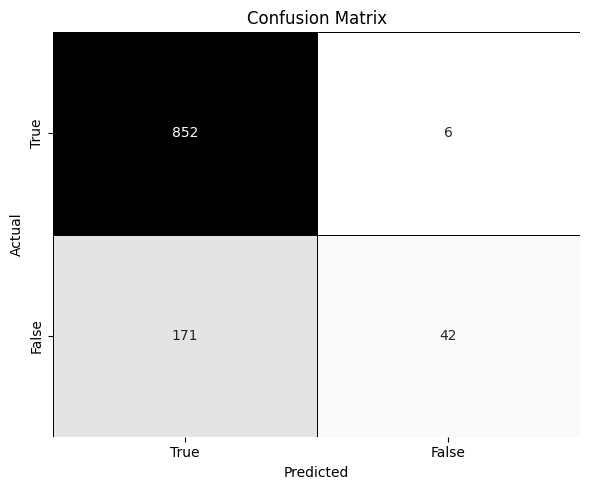

In [19]:
# Visualizing Confusion Matrix

labels = ['True', 'False']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False, 
            xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

From the classification report, we can see that the model is very good at predicting class 0, when landslide events do not result in fatalities. The precision tells us that 83% of the instances that the model predicted as 0 were actually class 0, and the recall tells us that 99% of all actual 0’s were correctly identified as 0. The model also had a good precision for class 1, when landslide events do result in fatalities, however it had a low recall for this class, correctly identifying only 20% of the events that occurred in fatalities. These results make sense after noting in the exploratory data analysis that the dataset mainly consists of landslides that did not occur in fatalities, leading the model to predict many more 0’s than 1’s. 